In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import itertools

## Analyse Moyenne-Variance

L'analyse moyenne-variance est une m√©thode de gestion quantitative introduite en 1962 par Harry Markowitz.
Cette m√©thode vise √† minimiser le risque (ou maximiser le rendement ajust√© du risque) par l'utilisation de la diversification et par la r√©solution de programmes d'optimisations sous contraintes pour trouver l'allocation la plus optimale pour chaque niveau de risque. 

En effet, Harry Markowitz a d√©montr√© analytiquement qu'il √©tait possible, par la construction d'un portefeuille diversifi√©, de minimiser le risque pour une esp√©rance de gain √©quivalente √† un portefeuille moins diversifi√©. Cette ensemble de portefeuille constitue la fronti√®re efficiente.

<u> Protocoles </u>:

- Construction d'un portefeuille diversifi√© (actifs faiblement corr√©l√©s entre eux)


- Simulations num√©riques pour g√©n√©rer un tr√®s grand nombre d'allocations diff√©rentes


- Estimations du rendement et de la variance de chacun de ces portefeuilles


- Construction du programme d'optimisation sous contraintes visant √† minimiser le risque ou maximiser le rendement ajust√© du risque (Ratio de Sharpe) tout en respectant les contraintes de gestion et de profil. 


- R√©solution du programme d'optimisation et construction de la fronti√®re efficiente.


- Choisir un portefeuille parmi l'ensemble des portefeuilles contenu dans la fronti√®re efficiente


### Cas n = 2

Dans un premier temps, exposons la th√©orie de Markowitz et de son analyse moyenne-variance dans le cas particulier o√π notre portefeuille contient 2 actifs, A et B.

Concentrons nous tout d'abord sur l'impact de la diversification du portefeuille. Pour rappel, la diversification du portefeuille, dans sa plus simple des formes, est repr√©sent√©e par les coefficients de corr√©lations lin√©aires entre les diff√©rents actifs qui le composent.

Un portefeuille diversifi√© doit √™tre construit de telle sorte que les actifs qui le composent soient faiblement voir n√©gativement corr√©l√©s entre eux ce qui tendrait √† stabiliser la volatilit√© globale du portefeuille. Les actifs n'√©voluent pas dans la m√™me direction ou du moins pas avec la m√™me intensit√©.

Dans la cellule suivante, je vais vous illustrer l'impact de ce coefficient en construisant dans le plan (sigma_p, mu_p) les graphes repr√©sentants l'ensemble des portefeuilles pour un certain coefficient de corr√©lation.

In [2]:
# Param√®tres
mu_a = 0.02  # Moyenne des rendements de l'actif A
mu_b = 0.05  # Moyenne des rendements de l'actif B
sigma_a = 0.10  # √âcart-type des rendements de l'actif A
sigma_b = 0.20  # √âcart-type des rendements de l'actif B
w_a = np.linspace(0, 1, 100) # Liste des poids appliqu√©s √† l'actif A
w_b = 1 - w_a # Liste des poids appliqu√©s √† l'actif B

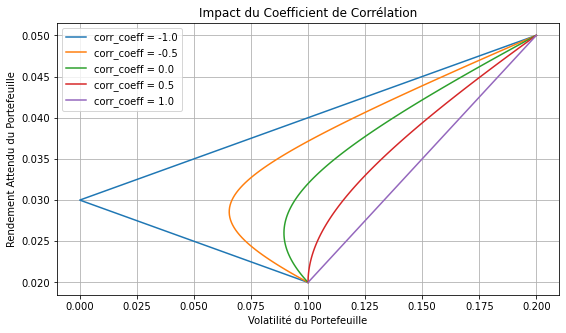

In [3]:
# Trac√© des figures
plt.figure(figsize=(9, 5))
for corr_coeff in np.linspace(-1, 1, 5):
    mu_p = w_a * mu_a + w_b * mu_b
    sigma_p = np.sqrt((w_a * sigma_a)**2 + (w_b * sigma_b)**2 + 2 * w_a * w_b * corr_coeff * sigma_a * sigma_b)
    plt.plot(sigma_p, mu_p, label=f"corr_coeff = {corr_coeff}")

plt.xlabel('Volatilit√© du Portefeuille')
plt.ylabel('Rendement Attendu du Portefeuille')
plt.title('Impact du Coefficient de Corr√©lation')
plt.legend()
plt.grid(True)
plt.show()

### Conclusions graphiques et th√©oriques

Ainsi, nous observons nettement que plus le coefficient de corr√©lation entre les deux actifs est bas plus le niveau de risque pour un m√™me rendement l'est aussi. 

Markowitz a ainsi d√©montr√© l'int√©r√™t fondamental de la diversification dans l'investissement en expliquant que si nous prenons deux portefeuilles diff√©rents par les actifs qui les composent et par leurs corr√©lations lin√©aires entre eux, mais similaires par les performances et les niveaux de risques individuels, alors le portefeuille pr√©sentant les actifs les moins corr√©l√©s entre eux saura moins risqu√© pour un m√™me niveau de rendement.

La diversification ne vise pas √† maximiser le rendement mais √† minimiser le risque pour un m√™me niveau de rendement.
Math√©matiquement, on dira que l'esperance de rendement n'est pas fonction du coeff de corr√©lation.

$$
\mu_P = w_A \cdot \mu_A + w_B \cdot \mu_B
$$


Analysons d√©sormais plus en profondeur les cas pour des valeurs particuli√®res du coefficient de corr√©lation.

- Cas corr_coef = 1

$$
\sigma^2_p = w_A^2 \cdot \sigma_A^2 + w_B^2 \cdot \sigma_B^2 + 2 \cdot w_A \cdot w_B \cdot \sigma_A \cdot \sigma_B
$$

Graphiquement pour ce cas, nous observons que les deux actifs sont r√©li√©s par un segment de droite. Cette progession lin√©aire s'explique par le fait que pour un coeff √©gal √† 1. La rentabilit√© esp√©r√©e et le risque du portefeuille sont des moyennes pond√©r√©es resp. de la rentabilit√© esp√©r√©es et du risque des deux titres.

Dans ce cas de figure, il est clair qu'il est impossible d'obtenir un niveau de risque inf√©rieur √† celui de l'actif le moins risqu√©. 

- Cas -1 < corr_coef < 1

Pour rappel, P est un portefeuille compos√© d'un actif A et d'un actif B.
Notons x et (1-x) leur poids respectif dans le portefeuille.

Determinons dans ces cas, le poids de variance minimale qui correspond √† la d√©riv√©e premi√®re de la variance du portefeuille par rapport.

$$
\sigma^2_p = x^2 \cdot \sigma^2_A + (1 - x)^2 \cdot \sigma^2_B + 2 \cdot x \cdot (1 - x) \cdot \rho \cdot \sigma_A \cdot \sigma_B
$$

$$
\frac{d}{dx} (\sigma^2_p) = x \cdot \sigma^2_A - (1 - x) \cdot \sigma^2_B + (1 - 2x) \cdot \rho \cdot \sigma_A \cdot \sigma_B = 0
$$

$$
x* = \frac{\sigma^2_B - \rho \cdot \sigma_A \cdot \sigma_B}{(\sigma^2_A + \sigma^2_B - \rho \cdot \sigma_A \cdot \sigma_B)}
$$

Ainsi, pour ce portefeuille nous avons la variance suivante:

$$
\sigma^2_p = \frac{\sigma^2_A \sigma^2_B (1 - \rho^2)}{\sigma^2_A + \sigma^2_B - 2 \rho \sigma_A \sigma_B}
$$

En supposant que l'actif A est l'actif avec la variance la plus faible et donc le moins risqu√©, calculons le delta de risque entre ces deux grandeurs.

$$
\delta = - \frac{\sigma^2_A (\sigma_A - \rho \sigma_B)^2}{\sigma^2_A + \sigma^2_B - 2 \rho {\sigma_A \sigma_B}} 
$$

Ainsi on comprend que si le coefficient n'est pas √©gal au rapport des √©carts type avec au num√©rateur l'√©cart type de l'actif A (le moins risqu√©), le rendement du portefeuille sera toujours inf√©rieur √† celui de l'actif le moins risqu√©.

Ce que l'on peut aussi en d√©duire vis √† vis de la valeur de x* est que si le coefficient de corr√©lation est sup√©rieur √† ce rapport alors la valeur du poids sera positive, sinon elle sera n√©gative et on sera dans le cadre d'une vente √† d√©couvert sur l'actif A et d'un achat √† effet de levier sur l'actif B.

En revanche, si le coefficient de corr√©lation est √©gal √† ce rapport alors le niveau de risque du portefeuille sera √©gal √† celui de l'actif le moins risqu√©. Seul cas o√π la diversification ne joue pas (Cf. courbe --> corr_coef = 0.5).

- Cas corr_coef = -1

Seul cas o√π le niveau de risque minimal est nul, pour une certain allocation.

<u>Conclusion</u>:

Si nous devons retenir une chose c'est que la diversification joue son r√¥le de minimiseur de risque √† partir du moment o√π le coefficient de corr√©lation est inf√©rieur √† 1 et diff√©rent du rapport des deux ecart types (moins risqu√© au num√©rateur).

 ---- Caract√®ristique Portefeuille Minimum Variance pour rho = -1.0 ---- 
Ponderation actif A 0.6667
Pond√©ration actif B 0.3333
Rendement du portefeuille 0.03
Volatilit√© du portefeuille 0.0


 ---- Caract√®ristique Portefeuille Minimum Variance pour rho = -0.5 ---- 
Ponderation actif A 0.7143
Pond√©ration actif B 0.2857
Rendement du portefeuille 0.0286
Volatilit√© du portefeuille 0.0655


 ---- Caract√®ristique Portefeuille Minimum Variance pour rho = 0.0 ---- 
Ponderation actif A 0.8
Pond√©ration actif B 0.2
Rendement du portefeuille 0.026
Volatilit√© du portefeuille 0.0894


 ---- Caract√®ristique Portefeuille Minimum Variance pour rho = 0.5 ---- 
Ponderation actif A 1.0
Pond√©ration actif B 0.0
Rendement du portefeuille 0.02
Volatilit√© du portefeuille 0.1


 ---- Caract√®ristique Portefeuille Minimum Variance pour rho = 1.0 ---- 
Ponderation actif A 2.0
Pond√©ration actif B -1.0
Rendement du portefeuille -0.01
Volatilit√© du portefeuille 0.0




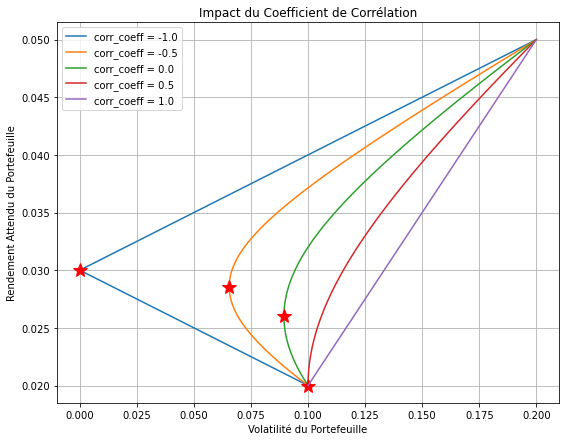

In [4]:
# Trac√©s des figures avec en plus les portefeuilles de variance minimale
plt.figure(figsize=(9, 7))
for corr_coeff in np.linspace(-1, 1, 5):
    mu_p = w_a * mu_a + w_b * mu_b
    sigma_p = np.sqrt(w_a**2 * sigma_a**2 + w_b**2 * sigma_b**2 + 2 * w_a * w_b * corr_coeff * sigma_a * sigma_b)
    # Reporting
    x = (sigma_b**2 - corr_coeff * sigma_a * sigma_b) / (sigma_a**2 + sigma_b**2 - 2 * corr_coeff * sigma_a * sigma_b)
    mu_p_var_min = x * mu_a + (1-x) * mu_b
    sigma_p_min = np.sqrt(x**2 * sigma_a**2 + (1 - x)**2 * sigma_b**2 + 2 * x * (1 - x) * corr_coeff * sigma_a * sigma_b)
    print(f" ---- Caract√®ristique Portefeuille Minimum Variance pour rho = {corr_coeff} ---- ")
    print("Ponderation actif A", round(x, 4))
    print("Pond√©ration actif B", round(1-x, 4))
    print("Rendement du portefeuille", round(mu_p_var_min, 4))
    print("Volatilit√© du portefeuille", round(sigma_p_min, 4))
    print("\n")
    # Trac√©s
    plt.plot(sigma_p, mu_p, label=f"corr_coeff = {corr_coeff}")
    if corr_coeff == 1.0: # Cas vente √† d√©couvert
        continue
    plt.plot(sigma_p_min, mu_p_var_min, color="red", marker="*", markersize=15)

    
plt.xlabel('Volatilit√© du Portefeuille')
plt.ylabel('Rendement Attendu du Portefeuille')
plt.title('Impact du Coefficient de Corr√©lation')
plt.legend()
plt.grid(True)
plt.show()

### Selection d'un portefeuille Equity US diversifi√©

Pour la suite de l'exploration, nous g√©n√©raliserons notre √©tude √† N actifs et pour illustrer chacune de mes prochaines d√©monstrations nous aurons besoin d'un portefeuille diversifi√© au sens de Markowitz.

Pour ce faire, j'ai r√©cup√©r√© d'internet un fichier excel contenant pletor de tickers Yahoo cat√©goris√©s par secteurs et place boursi√®re. Cependant, le csv n'a pas √©t√© maintenu depuis 2017 et il y aura sans doute des tickers obsol√©tes (suspension de cotation, fusion/acquisition, liquidation, ...) et/ou des tickers absents (IPO r√©cents).

Cet excel me permettra de boucler sur les tickers et d'automatiser l'extraction des donn√©es de prix via la biblioth√®que yfinance.

In [5]:
def tickers_returns_dataframe(start, end, benchmark_tickers=["^GSPC"], max_depth=10, countries=["USA"], sectors=[]):
    
    # R√©cup√©ration des donn√©es excel
    tickers_data = pd.read_excel("Ressources/tickers.xlsx", sheet_name="Stock")
    tickers_data_usa = tickers_data[tickers_data["Country"].isin(countries)].dropna()
    if sectors != []:
        tickers_data_usa = tickers_data[tickers_data["Category Name"].isin(sectors)]
    
    # Construction du DataFrame
    df, ix = pd.DataFrame(), 0
    delisted_tickers = []
    for ticker, company in zip(tickers_data_usa.Ticker, tickers_data_usa.Name):
        data = yf.Ticker(ticker).history(start=start)
        data.index = pd.to_datetime(data.index).strftime('%d-%m-%Y')
        # Handle yf exception for delisted tickers
        try:  
            error_message = yf.shared._ERRORS[ticker]
            delisted_tickers.append((ticker, company))
            continue
        except Exception as e:
            # Condition on volume's and stock's price
            n = len(data)
            if (data["Volume"].sum() < n*10e6 and data["Close"].sum() < n*10) or len(data) == 0:
                continue
            #Get daily returns for each stock
            data = data.Close.pct_change().dropna()
            # Set the dataFame
            if ix == 0:
                df[ticker] = data
            # Complete the DataFrame
            else:
                df = pd.merge(df, data, left_index=True, right_index=True)
                df.columns = list(df.columns[:-1]) + [ticker]
            # Max depth of our portfolio
            ix += 1
            if ix == max_depth:
                for benchmark_ticker in benchmark_tickers:
                    benchmark = yf.Ticker(benchmark_ticker).history(start=start, end=end).Close.pct_change().dropna()
                    benchmark.index = pd.to_datetime(benchmark.index).strftime('%d-%m-%Y')
                    df = pd.merge(df, benchmark, left_index=True, right_index=True)
                    df.columns = list(df.columns[:-1]) + [benchmark_ticker]
                break
    return df, delisted_tickers

In [6]:
start = "2022-08-01"
end = "2023-08-01"
df, delisted_tickers = tickers_returns_dataframe(start, end, max_depth=45)

Got error from yahoo api for ticker AGN, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- AGN: No timezone found, symbol may be delisted
Got error from yahoo api for ticker APC, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- APC: No timezone found, symbol may be delisted
ABX: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker ARNA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ARNA: No timezone found, symbol may be delisted
AET: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker ALXN, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ALXN: No timezone found, symbol may be delisted


In [7]:
df

AAPL       BAC      AMZN         T      GOOG        MO  \
Date                                                                     
02-08-2022 -0.009287 -0.019875 -0.009085 -0.019754  0.003637 -0.004994   
03-08-2022  0.038248  0.018160  0.039952  0.000545  0.024849  0.009126   
04-08-2022 -0.001926 -0.007134  0.021861 -0.005444  0.000758  0.000452   
05-08-2022 -0.001389  0.016767 -0.012415  0.004379 -0.005468 -0.003390   
08-08-2022 -0.002903 -0.013840 -0.009872 -0.019073 -0.000677  0.002721   
...              ...       ...       ...       ...       ...       ...   
25-07-2023  0.004514 -0.015314  0.002562 -0.010033  0.007466 -0.003070   
26-07-2023  0.004545  0.008087 -0.007589  0.006081  0.055949  0.002200   
27-07-2023 -0.006581 -0.014193  0.000780 -0.025520  0.001620  0.000878   
28-07-2023  0.013508 -0.001565  0.030877 -0.004135  0.024178 -0.002412   
31-07-2023  0.003166  0.003135  0.011119  0.004844  0.000752 -0.001539   

                 DAL        AA       AXP        DD  ...      AVGO        EA  \
Date                                                ...                       
02-08-2022 -0.012721  0.001243 -0.011283 -0.027077  ... -0.009620 -0.015129   
03-08-2022  0.044940  0.003103  0.025264 -0.007171  ...  0.029235  0.034060   
04-08-2022  0.002406 -0.013199  0.009265  0.007223  ...  0.011084 -0.000300   
05-08-2022 -0.011701  0.034901  0.004080  0.005293  ... -0.002460 -0.005104   
08-08-2022  0.024590 -0.015581 -0.001460  0.007643  ... -0.010717 -0.011391   
...              ...       ...       ...       ...  ...       ...       ...   
25-07-2023 -0.021904  0.055111 -0.007688  0.017353  ...  0.018190  0.013139   
26-07-2023 -0.000215 -0.021623  0.007508 -0.002214  ... -0.027124 -0.005302   
27-07-2023 -0.014646 -0.026693 -0.024739  0.015399  ...  0.000493 -0.009508   
28-07-2023 -0.000656  0.025066  0.011186 -0.001937  ...  0.007006  0.002473   
31-07-2023  0.011811  0.041139  0.020855  0.004269  ... -0.001267 -0.010881   

                  DB       AEM       APD      AMBA       NVS       ANF  \
Date                                                                     
02-08-2022 -0.013905 -0.016767 -0.012659  0.012545 -0.006657  0.009798   
03-08-2022  0.025852  0.009237  0.006513  0.038775 -0.002351  0.028539   
04-08-2022  0.010309  0.026989  0.048919 -0.011485  0.004360  0.002220   
05-08-2022  0.010204 -0.006856  0.019051 -0.005251  0.003989 -0.002215   
08-08-2022  0.002245  0.035435 -0.003312 -0.007300  0.004324  0.069922   
...              ...       ...       ...       ...       ...       ...   
25-07-2023  0.022907  0.010041  0.012413  0.033641  0.007013  0.013169   
26-07-2023  0.004307 -0.001912 -0.009286 -0.012358 -0.008872  0.026790   
27-07-2023 -0.051458 -0.031029 -0.000396 -0.011769 -0.000578  0.006458   
28-07-2023  0.004521  0.014430  0.001783  0.014542  0.003371  0.026181   
31-07-2023  0.001800  0.021239  0.006262  0.030767  0.006911 -0.009255   

                LULU     ^GSPC  
Date                            
02-08-2022 -0.013903 -0.006662  
03-08-2022  0.031665  0.015638  
04-08-2022  0.003234 -0.000777  
05-08-2022  0.004425 -0.001626  
08-08-2022 -0.004909 -0.001238  
...              ...       ...  
25-07-2023  0.004548  0.002815  
26-07-2023 -0.008217 -0.000155  
27-07-2023 -0.021716 -0.006425  
28-07-2023  0.019447  0.009878  
31-07-2023  0.001508  0.001469  

[250 rows x 46 columns]

In [8]:
delisted_tickers

[('AGN', 'Allergan plc'),
 ('APC', 'Anadarko Petroleum Corporation'),
 ('ABX', 'Barrick Gold Corporation'),
 ('ARNA', 'Arena Pharmaceuticals, Inc.'),
 ('AET', 'Aetna Inc.'),
 ('ALXN', 'Alexion Pharmaceuticals, Inc.')]

In [9]:
# Matrice de correlation
corr_matrix = df.corr()
corr_matrix

AAPL       BAC      AMZN         T      GOOG        MO       DAL  \
AAPL   1.000000  0.427195  0.627405  0.293602  0.687985  0.312443  0.457116   
BAC    0.427195  1.000000  0.396018  0.370882  0.346814  0.366564  0.558420   
AMZN   0.627405  0.396018  1.000000  0.269572  0.705588  0.162790  0.369686   
T      0.293602  0.370882  0.269572  1.000000  0.154367  0.219926  0.297458   
GOOG   0.687985  0.346814  0.705588  0.154367  1.000000  0.154233  0.302650   
MO     0.312443  0.366564  0.162790  0.219926  0.154233  1.000000  0.311049   
DAL    0.457116  0.558420  0.369686  0.297458  0.302650  0.311049  1.000000   
AA     0.380203  0.493508  0.387378  0.242544  0.311926  0.289462  0.447666   
AXP    0.584795  0.638989  0.476031  0.336090  0.432759  0.308293  0.563757   
DD     0.466709  0.618700  0.393862  0.278748  0.407627  0.339041  0.487151   
BABA   0.278433  0.291845  0.350611  0.232951  0.267225  0.106813  0.301826   
ABT    0.506507  0.430974  0.415750  0.295466  0.448231  0.357605  0.336043   
AMAT   0.627242  0.406329  0.585074  0.181513  0.557029  0.242611  0.479503   
AMGN   0.270689  0.228599  0.125657  0.257696  0.204767  0.374495  0.173055   
AAL    0.448443  0.496593  0.436882  0.213580  0.337254  0.262523  0.849426   
AIG    0.445979  0.668581  0.289536  0.313238  0.283567  0.361804  0.566019   
ALL    0.260780  0.523869  0.181611  0.188034  0.182360  0.412672  0.357329   
ADBE   0.628246  0.360285  0.581568  0.175374  0.593298  0.186186  0.433807   
GOOGL  0.688232  0.346018  0.699906  0.154066  0.997756  0.154637  0.298893   
ACN    0.672076  0.502380  0.602377  0.294502  0.613634  0.279137  0.468099   
ABBV   0.147709  0.229975  0.082971  0.148852  0.090516  0.346638  0.118673   
MT     0.394141  0.532380  0.410711  0.300726  0.298938  0.297108  0.464783   
LLY    0.211668  0.089005  0.120097  0.142166  0.130035  0.202972  0.117758   
APA    0.260449  0.415315  0.184793  0.185689  0.213663  0.316717  0.322050   
ADP    0.618746  0.491988  0.442630  0.237518  0.540528  0.379579  0.420537   
AKAM   0.497655  0.442242  0.497618  0.296256  0.535209  0.146958  0.399135   
NLY    0.446059  0.451520  0.442883  0.272796  0.401883  0.253861  0.411927   
ATVI   0.258095  0.175574  0.201683  0.122578  0.253337  0.171725  0.150726   
ADSK   0.646960  0.419498  0.623197  0.226856  0.582122  0.191801  0.484131   
ADM    0.295652  0.475271  0.197194  0.211972  0.158329  0.448659  0.280301   
WBA    0.431523  0.435495  0.356626  0.277550  0.347340  0.406279  0.295647   
LUV    0.418524  0.495769  0.328218  0.285406  0.305949  0.238391  0.738084   
ACAD   0.369520  0.323329  0.316401  0.093944  0.277429  0.159622  0.341892   
PANW   0.445828  0.252722  0.430963  0.152186  0.369381  0.074856  0.326048   
AMD    0.583086  0.337003  0.572531  0.119693  0.565543  0.148224  0.381104   
AEP    0.433122  0.298193  0.298013  0.354074  0.299836  0.396197  0.240689   
AVGO   0.637327  0.428947  0.516470  0.183540  0.488876  0.265878  0.483395   
EA     0.419488  0.329389  0.370928  0.236654  0.382202  0.094650  0.319150   
DB     0.376121  0.621897  0.336924  0.271868  0.269244  0.273814  0.531997   
AEM    0.267849  0.190160  0.341359  0.236761  0.253007  0.184792  0.191203   
APD    0.382519  0.408396  0.293521  0.216898  0.240129  0.339283  0.410758   
AMBA   0.524878  0.396019  0.485786  0.235206  0.415966  0.192112  0.416676   
NVS    0.199391  0.267755  0.159090  0.212059  0.105711  0.223964  0.168798   
ANF    0.347591  0.303924  0.331430  0.161036  0.236883  0.188685  0.311656   
LULU   0.481385  0.415502  0.465715  0.134592  0.394505  0.254810  0.416383   
^GSPC  0.842938  0.670470  0.729259  0.376637  0.721091  0.435320  0.617497   

             AA       AXP        DD  ...      AVGO        EA        DB  \
AAPL   0.380203  0.584795  0.466709  ...  0.637327  0.419488  0.376121   
BAC    0.493508  0.638989  0.618700  ...  0.428947  0.329389  0.621897   
AMZN   0.387378  0.476031  0.393862  ...  0.516470  0.370928  0.336924   
T

In [10]:
# Toutes les combinaisons possible de portefeuille
number_of_stocks = 6
stocks = corr_matrix.columns
combinations = list(itertools.combinations(stocks, number_of_stocks))
len(combinations)

9366819

In [11]:
# Selection des combinaisons dont les matrices de corr√©lations ont leurs coefficients non diagonaux cap√©s par un seuil que je fixe
corr_limit = 0.25
portefeuilles_faibles_corr = []
for combination in combinations:
    combination = list(combination)
    sub_matrix = corr_matrix.loc[combination, combination]
    if (sub_matrix.values[~pd.DataFrame(np.eye(len(sub_matrix), dtype=bool)).values] < corr_limit).all():
        portefeuilles_faibles_corr.append(combination)
        break #Je r√©cup√®re le premier ok
print(portefeuilles_faibles_corr)

[['T', 'MO', 'BABA', 'LLY', 'ATVI', 'ACAD']]


In [12]:
#Check
tickers = portefeuilles_faibles_corr[0]
df[tickers].corr()

T        MO      BABA       LLY      ATVI      ACAD
T     1.000000  0.219926  0.232951  0.142166  0.122578  0.093944
MO    0.219926  1.000000  0.106813  0.202972  0.171725  0.159622
BABA  0.232951  0.106813  1.000000  0.046923  0.117812  0.162276
LLY   0.142166  0.202972  0.046923  1.000000  0.048126  0.133939
ATVI  0.122578  0.171725  0.117812  0.048126  1.000000  0.118761
ACAD  0.093944  0.159622  0.162276  0.133939  0.118761  1.000000

### Cas √† n actifs

Consid√©rons d√©sormais un portefeuille compos√© de n actifs risqu√©s avec n > 2.

w : vecteur R^n contenant les poids attribu√©s √† chaque actifs

$$
w = \begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_n
\end{bmatrix}
$$

R : vecteur R^n contenant les rentabilit√©s de chaque actifs

$$
\mu = \begin{bmatrix}
\mu_1 \\
\mu_2 \\
\vdots \\
\mu_n
\end{bmatrix}
$$

e : vecteur de R^n dont toutes les composantes sont √©gales √† 1

V : matrice de variances-covariances (n, n) des rentabilit√©s des actifs financiers. On supposera que notre portefeuille est diversifi√© et que chaque actif n'est pas lin√©airement d√©pendant aux autres, ainsi nous consid√©rerons que cette matrice est inversible. Cette hypoth√®se nous permettra de b√©n√©ficier de certaines propri√©t√©s simplificatrices.

La diversification garantit l'hypoth√©se d'une solution unique pour les probl√®mes d'optimisations √† suivre. 

$$
\Sigma = \begin{bmatrix}
\sigma_{1}^2 & \sigma_{1,2} & \cdots & \sigma_{1,n} \\
\sigma_{2,1} & \sigma_{2}^2 & \cdots & \sigma_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{n,1} & \sigma_{n,2} & \cdots & \sigma_{n}^2
\end{bmatrix}
$$

Rendement esp√©r√© du portefeuille

$$
E(R_p) = \mathbf{w}^T \cdot \boldsymbol{\mu} = \sum_{i=1}^{n} w_i \cdot \mu_i
$$

Variance attendue du portefeuille

$$
\sigma^2_p = \mathbf{w}^T \cdot \boldsymbol{\Sigma} \cdot \mathbf{w} = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i \cdot w_j \cdot \sigma_{ij} = \sum_{i=1}^{n} w_i^2 \cdot \sigma_i^2 + 2 \cdot \sum_{i=1}^{n} \sum_{j=i+1}^{n} w_i \cdot w_j \cdot \sigma_{ij}
$$

Calculons d√©sormais la d√©riv√©e partielle de cette variance par rapport au poids du vecteur w du portefeuille:

$$
\frac{\partial \sigma_p^2}{\partial w_i} = \frac{\partial}{\partial w_i} (\mathbf{w}^T \cdot \boldsymbol{\Sigma} \cdot \mathbf{w})
$$

$$
\frac{\partial \sigma_p^2}{\partial w_i} = \frac{\partial (\mathbf{w}^T \cdot \boldsymbol{\Sigma} \cdot \mathbf{w})}{\partial (\mathbf{w}^T)} \cdot \frac{\partial (\mathbf{w}^T)}{\partial w_i} + \frac{\partial (\mathbf{w}^T \cdot \boldsymbol{\Sigma} \cdot \mathbf{w})}{\partial \boldsymbol{\Sigma}} \cdot \frac{\partial \boldsymbol{\Sigma}}{\partial w_i} + \frac{\partial (\mathbf{w}^T \cdot \boldsymbol{\Sigma} \cdot \mathbf{w})}{\partial \mathbf{w}} \cdot \frac{\partial \mathbf{w}}{\partial w_i}
$$

$$
\frac{\partial \sigma_p^2}{\partial w_i} = 2 \cdot (\boldsymbol{\Sigma} \cdot \mathbf{w})_i = 2 \cdot \sum_{j=1}^{n} \sigma_{ij} \cdot w_j
$$


Cette derni√®re expression montre que la contribution marginale d'un titre au risque total du portefeuille se mesure par la covariance entre les rendements de l'actif et ceux du portefeuille. De m√™me, on peut d√©montrer cette m√™me propri√©t√© en appliquant une √©quipond√©ration des actifs du portefeuille √† 1/n (Hint: mettre en √©vidence deux moyennes).

Vous pourrez conclure qu'un portefeuille comprenant un grand nombre d'actifs voit sa variance tendre vers sa covariance moyenne. Ceci indique que dans le contexte d'un portefeuille bien diversifi√© seules les covariances impactent le portefeuille.

La determination de l'ensemble des portefeuilles minimisant la variance pour une esp√©rance de rentabilit√© fix√©e passe par la r√©solution du probl√®me d'optimisation quadratique :

- Rendement esp√©r√© fix√© : $w^T \mu = \bar{r}_p$ (contrainte de rendement)
- Somme des poids √©gale √† 1 : $w^T \mathbf{1} = 1$ (contrainte de budget)

La fonction objective √† minimiser est : $\sigma_p^2 = w^T \Sigma w$

Notez ici qu'il n'y aucune contrainte de non n√©gativit√© des poids ce qui signifie que les ventes √† d√©couvert sont autoris√©es.

Ainsi, par la m√©thode des lagrangiens, le probl√®me d'optimisation sous contrainte devient le probl√®me d'optimisation libre suivant:

$$
Min[\mathcal{L}(w, \lambda, \alpha) = w^T \Sigma w + \lambda (\bar{r}_p - w^T \mu) + \alpha (w^T \mathbf{1} - 1)]
$$

Ainsi, les conditions necessaires du premier ordre sont:

$$
\begin{align*}
\frac{\partial \mathcal{L}}{\partial w} &= 2 \Sigma w - \lambda \mu + \alpha \mathbf{1} = 0 \\
\frac{\partial \mathcal{L}}{\partial \lambda} &= \bar{r}_p - w^T \mu = 0 \\
\frac{\partial \mathcal{L}}{\partial \alpha} &= w^T \mathbf{1} - 1 = 0
\end{align*}
$$

Biens√ªr, aucun actif n'est consid√©r√© comme redondant c'est √† dire comme combinaison lin√©aire d'autres actifs march√©s.
La matrice de variance-covariance est inversible et cette matrice est d√©finie positive par nature de ses coefficients.

L'inversibilit√© de la matrice de variance-covariance (Œ£) signifie que cette matrice est non singuli√®re, c'est-√†-dire qu'elle ne poss√®de pas d'inversion. Cela est essentiel pour que le syst√®me d'√©quations de r√©solution du premier ordre puisse √™tre r√©solu de mani√®re unique pour obtenir les poids optimaux (w) ainsi que les multiplicateurs de Lagrange (Œª et Œ±) qui satisfont les conditions d'optimalit√©.

La d√©finie positivit√© de la matrice de variance-covariance (Œ£) garantit que la fonction objectif du probl√®me d'optimisation est strictement convexe. Cela signifie que la fonction forme une "cuve" vers le bas et ne poss√®de qu'un seul minimum global. En d'autres termes, il n'y a pas de cr√™tes ou de points de selle dans la fonction objectif qui pourraient induire des solutions non optimales.

Apr√®s r√©solution du syst√®me, nous obtenons comme valeurs pour les multiplicateurs:

$$
\lambda = 2 \cdot \frac{(C \cdot \bar{r}_p - A)}{d}
$$

$$
\delta = 2 \cdot \frac{(B - A \cdot \bar{r}_p)}{d}
$$

o√π

- $
A = e^T \cdot {\Sigma}^{-1} \cdot {\mu}
$

- $
B = {\mu}^T \cdot {\Sigma}^{-1}{\mu}
$

- $
C = e^T \cdot {\Sigma}^{-1} \cdot e
$

- $
d = BC - A^2
$

Ainsi, nous obtenons le vecteur d'allocation qui optimise notre portefeuille est √©gale √†:

$$
w = \frac{1}{d} \cdot (B \cdot \Sigma^{-1}\cdot e - A \cdot \Sigma^{-1}\cdot\mu) + \bar{r}_p \cdot \frac{1}{d} \cdot (C \cdot \Sigma^{-1} \cdot \mu - A \cdot \Sigma^{-1} \cdot e)
$$

Ainsi nous pouvons diff√©rencier deux composante w1 et w2 qui ne d√©pendent pas de l'objectif d'esp√©rance de rentabilit√©. Ces deux quantit√©s sont uniquement d√©pendant des esp√©rances de rendement individuels des titres, des leur variance et de leurs covariances.

Ainsi, on peut conclue que tout portefeuille de la fronti√®re de variance minimale peut s'√©crire comme la combinaison lin√©aire de deux portefeuilles sp√©ciaux de rendement $(1-\bar{r_p})$ et $\bar{r_p}$ dont les poids respectifs sont w1 et (w1 + w2).

Ainsi, on comprend que le premier portefeuille correspond au portefeuille optimal de rentabilit√© esp√©r√©e nulle et le deuxi√®me au portefeuille optimal de rentabilit√© esp√©r√©e 1.

Ainsi, au sens de Markowitz l'ensemble des portefeuille optimaux est une demi droite ind√©pendament du nombre d'actifs.

Rappel lorsque vous avez n actifs dans votre portefeuille avec une contrainte de budget (ce qui est toujours le cas dans la r√©alit√©) la dimension de l'espace associ√© aux allocations est de n-1. 

### (Application) Cas portefeuilles √† 5 actifs en utilisant la m√©thode d'optimisation ci-dessus

In [13]:
data = yf.download(tickers, start=start, end=end)["Adj Close"]
data

[*********************100%***********************]  6 of 6 completed


ACAD       ATVI        BABA         LLY  \
Date                                                                      
2022-08-01 00:00:00-04:00  14.110000  79.225334   90.339996  319.638977   
2022-08-02 00:00:00-04:00  15.010000  78.473442   92.620003  315.743988   
2022-08-03 00:00:00-04:00  14.970000  79.729881   95.720001  309.462616   
2022-08-04 00:00:00-04:00  15.620000  79.799141   97.430000  301.534546   
2022-08-05 00:00:00-04:00  16.440001  79.630951   92.559998  297.126740   
...                              ...        ...         ...         ...   
2023-07-25 00:00:00-04:00  29.600000  91.740326   94.980003  456.561310   
2023-07-26 00:00:00-04:00  29.160000  91.680962   97.139999  452.619751   
2023-07-27 00:00:00-04:00  29.020000  91.156616   95.440002  454.016754   
2023-07-28 00:00:00-04:00  29.040001  91.542458  100.550003  457.499298   
2023-07-31 00:00:00-04:00  29.240000  91.770004  102.160004  453.577698   

                                  MO          T  
Date                                             
2022-08-01 00:00:00-04:00  40.486267  17.574152  
2022-08-02 00:00:00-04:00  40.284065  17.226986  
2022-08-03 00:00:00-04:00  40.651703  17.236368  
2022-08-04 00:00:00-04:00  40.670086  17.142538  
2022-08-05 00:00:00-04:00  40.532219  17.217602  
...                              ...        ...  
2023-07-25 00:00:00-04:00  45.459999  14.800000  
2023-07-26 00:00:00-04:00  45.560001  14.890000  
2023-07-27 00:00:00-04:00  45.599998  14.510000  
2023-07-28 00:00:00-04:00  45.490002  14.450000  
2023-07-31 00:00:00-04:00  45.419998  14.520000  

[251 rows x 6 columns]

In [14]:
#Returns
returns = data.pct_change().dropna()
returns

ACAD      ATVI      BABA       LLY        MO  \
Date                                                                          
2022-08-02 00:00:00-04:00  0.063785 -0.009491  0.025238 -0.012186 -0.004994   
2022-08-03 00:00:00-04:00 -0.002665  0.016011  0.033470 -0.019894  0.009126   
2022-08-04 00:00:00-04:00  0.043420  0.000869  0.017865 -0.025619  0.000452   
2022-08-05 00:00:00-04:00  0.052497 -0.002108 -0.049985 -0.014618 -0.003390   
2022-08-08 00:00:00-04:00  0.010949  0.006336 -0.018583  0.003916  0.002721   
...                             ...       ...       ...       ...       ...   
2023-07-25 00:00:00-04:00 -0.013991  0.001945 -0.014219 -0.003875 -0.003070   
2023-07-26 00:00:00-04:00 -0.014865 -0.000647  0.022742 -0.008633  0.002200   
2023-07-27 00:00:00-04:00 -0.004801 -0.005719 -0.017500  0.003086  0.000878   
2023-07-28 00:00:00-04:00  0.000689  0.004233  0.053541  0.007671 -0.002412   
2023-07-31 00:00:00-04:00  0.006887  0.002486  0.016012 -0.008572 -0.001539   

                                  T  
Date                                 
2022-08-02 00:00:00-04:00 -0.019754  
2022-08-03 00:00:00-04:00  0.000545  
2022-08-04 00:00:00-04:00 -0.005444  
2022-08-05 00:00:00-04:00  0.004379  
2022-08-08 00:00:00-04:00 -0.019074  
...                             ...  
2023-07-25 00:00:00-04:00 -0.010033  
2023-07-26 00:00:00-04:00  0.006081  
2023-07-27 00:00:00-04:00 -0.025520  
2023-07-28 00:00:00-04:00 -0.004135  
2023-07-31 00:00:00-04:00  0.004844  

[250 rows x 6 columns]

In [15]:
# Variance Matrix
var_returns = returns.cov()
var_returns

ACAD      ATVI      BABA       LLY        MO         T
ACAD  0.000977  0.000056  0.000166  0.000066  0.000056  0.000051
ATVI  0.000056  0.000225  0.000058  0.000011  0.000029  0.000032
BABA  0.000166  0.000058  0.001071  0.000024  0.000039  0.000133
LLY   0.000066  0.000011  0.000024  0.000249  0.000036  0.000039
MO    0.000056  0.000029  0.000039  0.000036  0.000126  0.000043
T     0.000051  0.000032  0.000133  0.000039  0.000043  0.000306

--- MVP --- 
MVP Return:  0.0006793858886467432
MVP Std:  0.008532505529594994
MVP Allocation:  [[ 1.46987139 23.55138467  1.85668912 19.76421909 41.49103937 11.86679636]]


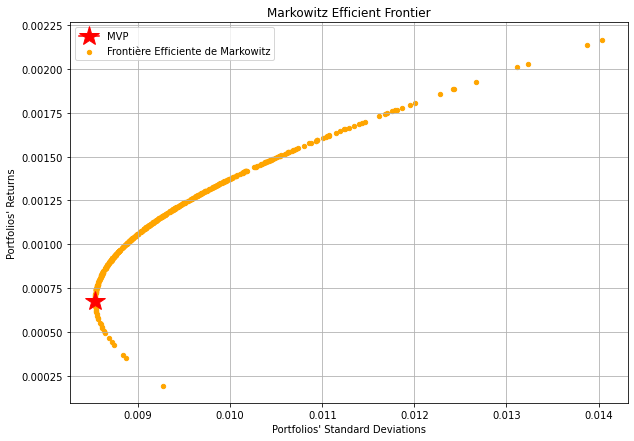

In [16]:
def weights_list(n):
    k = np.random.rand(n)
    return k / np.sum(k)

def analyse_moyenne_variance_risked_pf(returns, var_returns, nb_of_assets, number_of_simulations):
    portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations = [], [], []
    for _ in range(number_of_simulations):
        returns_m = np.asmatrix(returns.mean())
        vars_m = np.asmatrix(var_returns)

        # Random portfolios
        w = np.asmatrix(weights_list(nb_of_assets))
        portfolio_return = w * returns_m.T

        #Optimisation
        e = np.asmatrix(np.ones(nb_of_assets))
        inv_vars_m = np.linalg.inv(vars_m)
        A = e * inv_vars_m * returns_m.T
        B = returns_m * inv_vars_m * returns_m.T
        C = e * inv_vars_m * e.T
        d = B*C - np.power(A, 2)
        f1 = inv_vars_m * returns_m.T
        f2 = inv_vars_m * e.T

        w_optimized = (1/d) * ((C * portfolio_return - A) * f1.T + (B - A * portfolio_return) * f2.T)
        portfolio_optimized_allocations.append(w_optimized)
        portfolio_optimized_returns.append(np.array(w_optimized * returns_m.T).flatten()[0])
        portfolio_optimized_stds.append(np.array(np.sqrt(w_optimized * vars_m * w_optimized.T)).flatten()[0])
    return portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations

# ------------------ Parameters ------------------ 
nb_of_assets = len(tickers)
number_of_simulations = 500

# ------------------ Portefeuille de variance minimale ------------------
portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations = analyse_moyenne_variance_risked_pf(returns, var_returns, nb_of_assets, number_of_simulations)
mvp_std = np.min(portfolio_optimized_stds)
index_mvp_std = portfolio_optimized_stds.index(mvp_std)
mvp_return =  portfolio_optimized_returns[index_mvp_std]
mvp_allocation = portfolio_optimized_allocations[index_mvp_std]

print("--- MVP --- ")
print("MVP Return: ", mvp_return)
print("MVP Std: ", mvp_std)
print("MVP Allocation: ", 100*mvp_allocation)


# ------------------ Fonti√®re efficiente ------------------
plt.figure(figsize=(10, 7))
plt.scatter(portfolio_optimized_stds, portfolio_optimized_returns, color="orange", marker="o", s=19, label="Fronti√®re Efficiente de Markowitz")
plt.plot(mvp_std, mvp_return, label = "MVP", marker="*", color="red", markersize=20)
plt.title("Markowitz Efficient Frontier")
plt.xlabel("Portfolios' Standard Deviations")
plt.ylabel("Portfolios' Returns")
plt.grid()
plt.legend()

Nous avons trouver ci-dessus le point associ√© au portefeuille de variance minimale par une m√©thode num√©rique "np.min" qui utilise l'algorithme de tri 'quicksort' tr√®s efficace et d'ailleurs la plus efficace de tous les algo de tri avec une complexit√© $O(n*log(n))$.

Cependant nous pouvons tr√®s facilement trouver une solution ferm√©e √† ce probl√®me, puisque ce portefeuille se situe au point o√π la tangente est verticale par rapport √† la fronti√®re. Ce qui revient √† r√©soudre :

$$
\frac{\partial \sigma_p^2}{\partial \bar{r_p}} = 0
$$

$$
\begin{align*}
==> \bar{r_p} = \frac{A}{C} \\
==> \sigma_p^2 = \frac{1}{C}
\end{align*}
$$

Pour rappel les valeur de A et C ont √©t√© d√©termin√©es dans la r√©solution du probl√®me d'optimisation plus haut et valent toujours respectivement:

- $
e^T \cdot {\Sigma}^{-1} \cdot \mu
$
- $
e^T \cdot {\Sigma}^{-1} \cdot e
$

### Quelques conclusions graphiques quant √† l'application

L'ensemble des portefeuilles qu'il est possible de construire √† partir des n actifs est contenus dans l'air contenue √† l'int√©rieur de l'hyberbole.

Les portefeuilles dont l'esperance de rentabilit√© se trouve en dessous de A/C sont domin√©s c'est √† dire qu'il existe pour chacun des portefeuilles de cette portion de la courbe un autre portefeuille dont l'esp√©rance de rentabilit√© est plus √©lev√© pour une exposition au risque √©quivalente. Il s'agit du point symp√©triquement oppos√© et qui appartient √† la portion de la courbe que l'on appelle fronti√®re efficiente.

Ainsi, nous comprenons que dans le cadre de l'analyse moyenne-variance il nous faudra nous concentrer sur les portefeuilles contenue dans l'air au dessus de la droite horizontale d'√©quation: $\bar{r_p} = \frac{A}{C}$

Pour Markowitz (dans le cadre de son analyse moyenne-variance int√©gralement compos√© d'actifs risqu√©), un investisseur rationnel devra choisir le portefeuille minimisant la variance pour une esp√©rance de rentabilit√© sup√©rieur √† celle du portefeuille de variance minimale.

Plus tard, il sera int√©ressant de d√©terminer quelles conditions permettent de determiner les portefeuilles efficients dont les poids sont strictement positifs, i.e. les portefeuilles qui n'ont pas recours √† de la vente √† d√©couvert. Certains fonds sous la r√©gulation UCITS n'ont pas le droit d'avoir recours √† ce genre de gestion qui exposerait √† un risque plus √©lev√© les √©pargnants.

### Cas √† n actifs risqu√©s et un actif sans risque

Nous prendrons conventionnelement comme actif sans risque une obligation d'Etat √† taux fixe moyen terme (10 ans) de tr√®s bonne notation.

Pr√©c√©dement, nous avons men√© une analyse moyenne variance dans le cas o√π le march√© ne comportait aucun actif sans risque ce qui ne constitue pas toujours une bonne approximation et une approche rationnelle. Cependant la conjoncture de ces 5 derni√®res ann√©es (entre 2015-2022) avec la baisse des taux d'int√©r√™ts (jusqu'√† atteindre des niveaux n√©gatifs) ont √©t√© une conjoncture qui pouvait justifier la rationnalit√© de cette approche.

Pla√ßons nous d√©sormais dans un contexte de niveaux d'int√©r√™ts √©lev√©s un peu comme on est entrain de connaitre actuellement depuis un an. 

Notons $w_0$ la portion de la richesse investie dans l'actif sans risque, soit:
$$
w^T \cdot e + w_0 = 1 
$$

Ainsi, l'√©nonc√© de notre probl√®me d'optimisation sous contrainte a chang√© pour devenir:

$$
Min_w w^T \Sigma w
$$

$$ s.t. : w^T\cdot\mu + (1 -  w^T \cdot e) R_f = \bar{r_p} $$

Ainsi, via la m√©thode du Lagrangien nous transformons ce probl√®me d'optiomisation sous contrainte en un probl√®me d'optimisation libre dont la fonction objectif est: 

$$
Min_w(L(w, \lambda) = w^T \Sigma w + \lambda \cdot (w^T \cdot \mu + (1 -  w^T \cdot e) R_f))
$$

Les conditions du premier ordre n√©cessaires et suffisantes pour un minimum global sont:

$$
\begin{align*}
\frac{\partial \mathcal{L}}{\partial w} &= 2 \Sigma w + \lambda (\mu - e R_f) = 0 \\
\frac{\partial \mathcal{L}}{\partial \lambda} &= w^T \mu + (1 - w^T e) R_f = 0 \\
\end{align*}
$$

Apr√®s r√©solution, on obtient comme valeur de w:

$$
w = \Sigma^{-1} (\mu - e R_f) \cdot \frac{\bar{r_p} - R_f}{(\mu - e R_f)^T \Sigma^{-1} (\mu - e R_f)}
  = \Sigma^{-1} (\mu - e R_f) \cdot \frac{\bar{r_p} - R_f}{B - 2AR_f + C R_f^2}
$$

Ainsi, la variance d'un portefeuille de la fronti√®re efficiente s'√©crit:

$$
\sigma_p^2(\bar{r_p}) = \frac{(\bar{r_p} - R_f)^2}{B - 2AR_f + C R_f^2}
$$

On a donc pour un portefeuille de la fronti√®re efficient un √©cart type d√©fini par morceaux tel que:

$$
\frac{(\bar{r_p} - R_f)}{\sqrt(B - 2AR_f + C R_f^2)}, si \bar(r_p) \geq R_f \\
\frac{- (\bar{r_p} - R_f)}{\sqrt(B - 2AR_f + C R_f^2)}, si \bar(r_p) \leq R_f 
$$

<u> Conclusion </u>

Ainsi, en pr√©sence d'un actif sans risque, la fronti√®re efficiente est la r√©union de demi-droite se rejoignant au point de coordonn√©s (0, Rf) (Pour rappel la fronti√®re efficiente se trace dans le plan $(\sigma_p, \bar{r_p})$

### (Application) Cas d'un portefeuille √† n actifs risqu√© et un actif sans risque

In [17]:
data

ACAD       ATVI        BABA         LLY  \
Date                                                                      
2022-08-01 00:00:00-04:00  14.110000  79.225334   90.339996  319.638977   
2022-08-02 00:00:00-04:00  15.010000  78.473442   92.620003  315.743988   
2022-08-03 00:00:00-04:00  14.970000  79.729881   95.720001  309.462616   
2022-08-04 00:00:00-04:00  15.620000  79.799141   97.430000  301.534546   
2022-08-05 00:00:00-04:00  16.440001  79.630951   92.559998  297.126740   
...                              ...        ...         ...         ...   
2023-07-25 00:00:00-04:00  29.600000  91.740326   94.980003  456.561310   
2023-07-26 00:00:00-04:00  29.160000  91.680962   97.139999  452.619751   
2023-07-27 00:00:00-04:00  29.020000  91.156616   95.440002  454.016754   
2023-07-28 00:00:00-04:00  29.040001  91.542458  100.550003  457.499298   
2023-07-31 00:00:00-04:00  29.240000  91.770004  102.160004  453.577698   

                                  MO          T  
Date                                             
2022-08-01 00:00:00-04:00  40.486267  17.574152  
2022-08-02 00:00:00-04:00  40.284065  17.226986  
2022-08-03 00:00:00-04:00  40.651703  17.236368  
2022-08-04 00:00:00-04:00  40.670086  17.142538  
2022-08-05 00:00:00-04:00  40.532219  17.217602  
...                              ...        ...  
2023-07-25 00:00:00-04:00  45.459999  14.800000  
2023-07-26 00:00:00-04:00  45.560001  14.890000  
2023-07-27 00:00:00-04:00  45.599998  14.510000  
2023-07-28 00:00:00-04:00  45.490002  14.450000  
2023-07-31 00:00:00-04:00  45.419998  14.520000  

[251 rows x 6 columns]

In [18]:
returns

ACAD      ATVI      BABA       LLY        MO  \
Date                                                                          
2022-08-02 00:00:00-04:00  0.063785 -0.009491  0.025238 -0.012186 -0.004994   
2022-08-03 00:00:00-04:00 -0.002665  0.016011  0.033470 -0.019894  0.009126   
2022-08-04 00:00:00-04:00  0.043420  0.000869  0.017865 -0.025619  0.000452   
2022-08-05 00:00:00-04:00  0.052497 -0.002108 -0.049985 -0.014618 -0.003390   
2022-08-08 00:00:00-04:00  0.010949  0.006336 -0.018583  0.003916  0.002721   
...                             ...       ...       ...       ...       ...   
2023-07-25 00:00:00-04:00 -0.013991  0.001945 -0.014219 -0.003875 -0.003070   
2023-07-26 00:00:00-04:00 -0.014865 -0.000647  0.022742 -0.008633  0.002200   
2023-07-27 00:00:00-04:00 -0.004801 -0.005719 -0.017500  0.003086  0.000878   
2023-07-28 00:00:00-04:00  0.000689  0.004233  0.053541  0.007671 -0.002412   
2023-07-31 00:00:00-04:00  0.006887  0.002486  0.016012 -0.008572 -0.001539   

                                  T  
Date                                 
2022-08-02 00:00:00-04:00 -0.019754  
2022-08-03 00:00:00-04:00  0.000545  
2022-08-04 00:00:00-04:00 -0.005444  
2022-08-05 00:00:00-04:00  0.004379  
2022-08-08 00:00:00-04:00 -0.019074  
...                             ...  
2023-07-25 00:00:00-04:00 -0.010033  
2023-07-26 00:00:00-04:00  0.006081  
2023-07-27 00:00:00-04:00 -0.025520  
2023-07-28 00:00:00-04:00 -0.004135  
2023-07-31 00:00:00-04:00  0.004844  

[250 rows x 6 columns]

In [19]:
var_returns

ACAD      ATVI      BABA       LLY        MO         T
ACAD  0.000977  0.000056  0.000166  0.000066  0.000056  0.000051
ATVI  0.000056  0.000225  0.000058  0.000011  0.000029  0.000032
BABA  0.000166  0.000058  0.001071  0.000024  0.000039  0.000133
LLY   0.000066  0.000011  0.000024  0.000249  0.000036  0.000039
MO    0.000056  0.000029  0.000039  0.000036  0.000126  0.000043
T     0.000051  0.000032  0.000133  0.000039  0.000043  0.000306

Taux sans risque √©quivalent:  4%
Taux sans risque √©quivalent:  0.04
Tickers:  ['T', 'MO', 'BABA', 'LLY', 'ATVI', 'ACAD']

--- MVP --- 
MVP Return:  [[0.00018871]]
MVP Std:  0.0002374276671362106
MVP Allocation: 
Risked Assets: [[0.4718932451891685], [0.28526564290239786], [0.10252243575063259], [0.8256619331008521], [0.16622520259137896], [-0.6870212564402342]]
Unrisked Asset: [[98.8354528]]


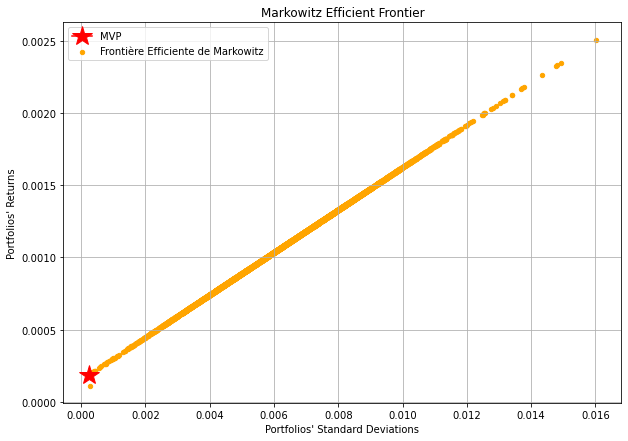

In [20]:
def analyse_moyenne_variance_less_risky_pf(returns, var_returns, r_f, nb_of_assets, number_of_simulations):
    r_f = np.power((1 + r_f), 1/255) - 1
    portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations = [], [], []
    for _ in range(number_of_simulations):
        returns_m = np.asmatrix(returns.mean())
        vars_m = np.asmatrix(var_returns)

        # Rendements des portefeuilles
        w = np.asmatrix(weights_list(nb_of_assets))
        portfolio_return = w * returns_m.T
        
        #Optimisation
        inv_vars_m = np.linalg.inv(vars_m)
        e = np.asmatrix(np.ones(nb_of_assets))
        A = e * inv_vars_m * returns_m.T
        B = returns_m * inv_vars_m * returns_m.T
        C = e * inv_vars_m * e.T

        w_optimized = inv_vars_m.T * (returns_m - e * r_f).T * (portfolio_return - r_f) / (B - 2 * A * r_f + C * r_f**2)
        portfolio_optimized_allocations.append(w_optimized)
        portfolio_optimized_returns.append(w_optimized.T * returns_m.T + (1- np.sum(w_optimized)) * r_f)
        if portfolio_return >= r_f:
            std_optimized = (portfolio_return - r_f)/np.sqrt(B - 2 * A * r_f + C * r_f**2)
            portfolio_optimized_stds.append(std_optimized)
        else:
            std_optimized = - (portfolio_return - r_f)/np.sqrt(B - 2 * A * r_f + C * r_f**2)
            portfolio_optimized_stds.append(std_optimized)
    
    return portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations

    # ------------------ Param√®tre ------------------
number_of_simulations = 5000
nb_of_assets = len(returns.columns)
r_f = 0.04
print("Taux sans risque √©quivalent: ", "4%")
print("Taux sans risque √©quivalent: ", r_f) #Journalier
print("Tickers: ", tickers)

# ------------------ Portefeuille de variance minimale ------------------
portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations = analyse_moyenne_variance_less_risky_pf(returns, var_returns, r_f, nb_of_assets, number_of_simulations)
mvp_std = np.min(portfolio_optimized_stds)
index_mvp_std = portfolio_optimized_stds.index(mvp_std)
mvp_return  = portfolio_optimized_returns[index_mvp_std]
mvp_allocation = portfolio_optimized_allocations[index_mvp_std]

print("\n--- MVP --- ")
print("MVP Return: ", mvp_return)
print("MVP Std: ", mvp_std)
print("MVP Allocation: ")
print("Risked Assets:", (100*mvp_allocation).tolist())
print("Unrisked Asset:", 100*(1 - sum(mvp_allocation)))

# ------------------ Fonti√®re efficiente ------------------
plt.figure(figsize=(10, 7))
plt.scatter(portfolio_optimized_stds, portfolio_optimized_returns, color="orange", marker="o", s=19, label="Fronti√®re Efficiente de Markowitz")
plt.plot(mvp_std, mvp_return, label = "MVP", marker="*", color="red", markersize=20)
plt.title("Markowitz Efficient Frontier")
plt.xlabel("Portfolios' Standard Deviations")
plt.ylabel("Portfolios' Returns")
plt.grid()
plt.legend()

In [21]:
(1+0.08/252)**252-1

0.0832733146466278

#### Conclusion graphique

Nous observons ci-dessus la fronti√®re efficiente d'un portefeuille contenant 6 actifs risqu√©s (actions) et un actif sans risque (obligation d'√©tat am√©ricain).

A l'instar de l'analyse moyenne-variance sur un portefeuille exclusivement risqu√©, la repartition des portefeuilles met en √©vidence encore une fois qu'il existe plusieurs portefeuilles expos√©s √† un m√™me niveau de risque sur la base des m√™mes actifs. Ainsi, nous comprendrons que la branche d√©croissante repr√©sente l'ensemble des portefeuilles qui maximise le risque et la branche croissante (fronti√®re efficiente) ceux qui le minimise pour un m√™me niveau de risque.

Le marker √©toile rouge repr√©sente le portefeuille de variance minimale qui sera, dans ce cas de figure d'apr√®s √©tude analytique, toujours de coordonn√©es (0, Rf) qui repr√©sente le portefeuille o√π l'on alloue pratiquement l'int√©gralit√© du poids √† l'actif sans risque.

### Comparaison avec le portefeuille risk only

Comparons d√©sormais les r√©sultats d'un tel portefeuille avec celui d'un portefeuille risqu√©. Dans le cadre d'un portefeuille risqu√©, le portefeuille de minimum variance correspond au point de coordonn√©es $(1/\sqrt C, A/C)$ sur le plan  (ùúéùëù,ùëüùëù¬Ø)

#### Cas Rf < A/C

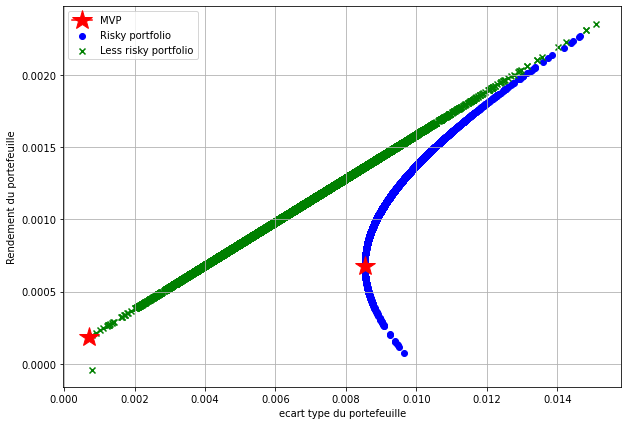

In [22]:
# Param√®tres
nb_of_assets = len(returns.columns)
number_of_simulations = 5000
r_f = 0.02

returns_risky_pf, stds_risky_pf, alloc_risky_pf = analyse_moyenne_variance_risked_pf(returns, var_returns, nb_of_assets, number_of_simulations)
returns_less_risky_pf, stds_less_risky_pf, alloc_less_risky_pf = analyse_moyenne_variance_less_risky_pf(returns, var_returns, r_f, nb_of_assets, number_of_simulations)

plt.figure(figsize=(10, 7))
# MVPs
### risky
mvp_std = np.min(stds_risky_pf)
index_mvp_std = stds_risky_pf.index(mvp_std)
mvp_return  = returns_risky_pf[index_mvp_std]
plt.plot(mvp_std, mvp_return, label = "MVP", marker="*", color="red", markersize=20)

###Less risky
mvp_std = np.min(stds_less_risky_pf)
index_mvp_std = stds_less_risky_pf.index(mvp_std)
mvp_return  = returns_less_risky_pf[index_mvp_std]
plt.plot(mvp_std, mvp_return, marker="*", color="red", markersize=20)

# Courbes
plt.scatter(stds_risky_pf, returns_risky_pf, marker="o", color="blue", label="Risky portfolio")
plt.scatter( stds_less_risky_pf, returns_less_risky_pf, marker="x", color="green", label="Less risky portfolio")
plt.xlabel("ecart type du portefeuille")
plt.ylabel("Rendement du portefeuille")
plt.grid()
plt.legend()
plt.show()

Dans ce cas pr√©sent, nous avons un taux sans risque inf√©rieur √† A/C qui correspond au rendement esp√©r√© du portefeuille de variance minimale exclusivement expos√© √† des actifs risqu√©s. 

Nous pouvons conjecturer graphiquement que si le taux sans risque est inf√©rieur √† A/C alors la demi-droite efficiente  de l'ensemble des portefeuille contenant un actif non risqu√© est tangent √† la fronti√®re efficiente du second.

<u> D√©monstration </u>

Nous devons trouver le point d'intersection entre les droites efficientes (portions de courbes croissantes) de la courbe verte et de la courbe bleue.

Notons ce portefeuille $_{inter}$.
Tout d'abord notons que ce portefeuille doit v√©rifier $w_0 = 0$ tel que: $ e^T w = 1$

En substituant √† l'√©quation: $ w = \Sigma^{-1} (\mu - e R_f) \cdot \frac{\bar{r_p} - R_f}{B - 2AR_f + C R_f^2}$

Nous obtenons:

$ \bar{r_p} - R_f = \frac{B - 2AR_f + C R_f^2}{A - C R_f}$

Donc, 

$$
w_{inter} = \frac{\Sigma^{-1}(\mu - e R_f)}{A - C R_f} \\
E(R_{inter}) = \frac{B - A R_f}{A - C R_f} \\
\sigma^2(R_{inter}) = \frac{B - 2AR_f + C R_f^2}{(A - C R_f)^2}
$$

Ainsi, nous avons montr√© dans cette partie que si $ R_f < A/C $ Alors, leur portefeuille commun se siue sur la fronti√®re efficiente.

Notez de m√™me que les portefeuilles efficients sur la portion de la demi-droite avant tangence correspondent aux portefeuilles o√π $w_0 >= 0$, au dela nous nous retrouvons avec des portefeuilles √† allocation n√©gative sur l'actif sans risque, ce qui n'est pas r√©aliste.

Nouvelle version du th√©or√®me de s√©paration √† deux fonds:

Dans un march√© contenant un actif sans risque, tout portefeuille peut √™tre per√ßu comme une combinaison lin√©aire de deux portefeuille un portefeuille compos√© de l'actif sans risque et un portefeuille compos√© des actifs risqu√©s.

Dans ce mod√®le, tous les investisseurs se situerait sur cette demi droite en fonction de leur richesse, de leur niveau d'aversion au risque. Un investisseur ayant moins d'aversion au risque placera un portion de richesse non nulle sur le portefeuille $w_inter$. Il pourrait meme faire jouer un effet de levier en allouant plus d 100% aux actifs risqu√©s et en vendant √† d√©couvert l'actif sans risque.

#### Cas Rf > A/C

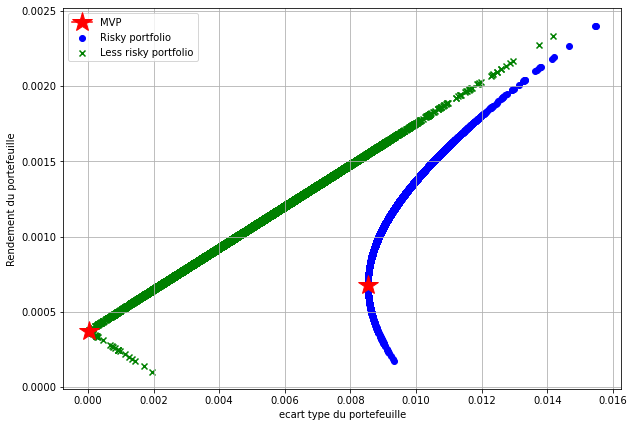

In [23]:
# Param√®tres
nb_of_assets = len(returns.columns)
number_of_simulations = 5000
r_f = 0.10

returns_risky_pf, stds_risky_pf, alloc_risky_pf = analyse_moyenne_variance_risked_pf(returns, var_returns, nb_of_assets, number_of_simulations)
returns_less_risky_pf, stds_less_risky_pf, alloc_less_risky_pf = analyse_moyenne_variance_less_risky_pf(returns, var_returns, r_f, nb_of_assets, number_of_simulations)

plt.figure(figsize=(10, 7))
# MVPs
### risky
mvp_std = np.min(stds_risky_pf)
index_mvp_std = stds_risky_pf.index(mvp_std)
mvp_return  = returns_risky_pf[index_mvp_std]
plt.plot(mvp_std, mvp_return, label = "MVP", marker="*", color="red", markersize=20)

###Less risky
mvp_std = np.min(stds_less_risky_pf)
index_mvp_std = stds_less_risky_pf.index(mvp_std)
mvp_return  = returns_less_risky_pf[index_mvp_std]
plt.plot(mvp_std, mvp_return, marker="*", color="red", markersize=20)

# Courbes
plt.scatter(stds_risky_pf, returns_risky_pf, marker="o", color="blue", label="Risky portfolio")
plt.scatter( stds_less_risky_pf, returns_less_risky_pf, marker="x", color="green", label="Less risky portfolio")
plt.xlabel("ecart type du portefeuille")
plt.ylabel("Rendement du portefeuille")
plt.grid()
plt.legend()
plt.show()

Dans ce cas de figure, le taux sans risque est sup√©rieur au rendement du portefeuille de variance minimale 
et on peut conjecturer mani√®re analogue √† la pr√©c√©dente √©tude, que la demi-droite des portefeuilles domin√©s est tangente √† la portion de courbe des protefeuilles risqu√©s domin√©s.

Ce cas de figure permet d'avoir des portfeuilles avec un vrai placement sans risque plus optimis√©s qu'un portfeuille risqu√© sur les deux demi droites et doit d√©courager l'investisseur √† placer dans des portefeuilles dont l'√©cart type est inclus dans l'intervalle $[0, 1/\sqrt C]$

### Sensibilit√©s du portefeuille

Comme nous avons pu le voir dans les sections pr√©c√©dentes, l'analyse moyenne-variance repose fortement sur le calcul des vecteurs de rendements et de la matrice de variance-covariance. 
Cette approche implique quelques limites:

- la consid√©ration de ce vecteur et de cette matrice comme stationnaires, ce qui peu sur le long-moyen terme dans des march√©s liquides √™tre une approximation valable mais PAS TOUOURS.

- Les portefeuilles institutionnelles exposant l'√©pargne public sont soumis √† des contraintes de diversification en terme de nombres d'actifs ce qui rend les calculs assez fastidieux.

- Il y a aussi les probl√®mes inh√©rent √† l'inversion de la matrice de variance-covariance qui complique la r√©solution

Cependant, il existe des m√©thodes bas√©es sur des hypoth√®ses simplificatrices qui permettent de r√©duire l'impact de ces limites:

- Mod√®les d'indices pour mod√©liser les fluctuations des rendements des titres financiers
- Supposer que les corr√©lations des titres de m√™me cat√©gories restes constantes

<u> Quelques m√©thodes </u>


- Mod√®le indiciel

-- Mod√®le de march√©s √† indice unique ou multi-indice -- 

Mod√®le de march√© √† indice unique

Dans cette situation, il sera th√©oriquement suffisant de calculer la covariance entre le rendement du chaque titre et celui de l'indice, ce qui reduit la complexit√© de calcul passant d'une complexit√© quadratique √† une complexit√© lin√©aire.

Mod√®le de march√© multi indice

Dans cette situation, il sera th√©oriquement suffisant de regrouper les actifs par indice et d'appliquer la covariance indicielle juste.

-- M√©thode d'Elton, Gruber et Padberg --

Cette m√©thode consiste √† class√© les actifs par ratio de Treynor, selectionn√© l'ensemble des titres sup√©rieurs √† un ratio seuil.

- Mod√®les de correction moyenne

Mod√®le de la moyenne g√©n√©rale qui pr√©suppose que tous les titres appratiennent √† la m√™me cat√©gorie et que leur coefficient de corr√©lation est √©gal √† la moyenne des coefficients de corr√©lations observ√©s entre les actifs.

Mod√®le de la moyenne g√©n√©rale par secteur qui pr√©suppose que tous les titres appartiennent au moins √† une cat√©gorie et que leur coefficient de corr√©lation est constant vis √† vis de cette cat√©gorie et est √©gal √† la moyenne des coefficients de corr√©lations observ√©s dans la cat√©gorie.

Conclusions empiriques sur les diff√©rentes approches

L'estimation directe de la matrice de variances-covariances sur des donn√©es historiques ne fournit pas une bonne pr√©diction des corr√©lations futurs. Les mod√®les √† indices ou √† moyenne permettent une meilleure pr√©cision en r√©duisant l'impact des fluctuation, cependant le risque d'estimation n'est qu'en partie supprim√©.

Travaux et assentiment g√©n√©ral:

Best et Grauer (1991) ont d√©montr√© empiriquement que la prise en compte d'un certain nombre de contraintes portant notamment sur les ventes √† d√©couvert permettent de r√©duire en partie les cons√©quences des erreurs d'estimation.

Frost et Savarion (1988) ont d√©montr√© empiriquement que le risque d'estimation √©tait bien plus fort sur les rendements plut√¥t que sur les variances-covariances. Ils ont ainsi d√©montr√© que dans un cas de fort risque d'estimation il sera judicieux de r√©duire ce risque en √©quipond√©rant le portefeuille.

### Applications Analyse Moyenne-Variance avec hypoth√®ses simplificatrices et methodes de corrections

Ainsi, mettons nous au niveau des gestionnaires institutionnelles qui doivent r√©pondre √† certaines exigences de profondeur de portefeuilles qui peuvent contenir jusqu'√† plusieurs centaines de titres.

L'id√©e dans cette section est alors d'appliquer les m√©thodes de simplification et d'optimisation de calculs √©nonc√©es dans la pr√©c√©dente partie.

#### Mod√®le de march√© √† indice unique

Appliquons ce mod√®le en selectionnant des big et mega caps americaines (selection al√©atoire pour le moment, les crit√®res de screening seront vu plus tard) et en utilisant tout naturellement comme indice de march√© le S&P 500 (indice le plus repr√©sentatif du march√© action am√©ricain).

### Contraintes suppl√©mentaires

Pour l'instant nous n'avons r√©solu que des probl√®mes d'optimisations avec une seule contrainte, la contrainte de budget qui permet une utilisation globale de la richesse disponible: $ w^T e = 1 $

Or, il est tout √† fait possible d'ajouter des contraintes suppl√©mentaires √† notre probl√®me, tel que des co√ªts de transaction, des plafonds et des seuils d'allocations, ... . Formellement, il s'agit de r√©soudre des programmes d'optimisation du type: 

$$ 
Min_w(w^T \Sigma w) \\
w^T e = 1 \\
w ‚Ç¨ K \\
$$

Ceci fait pr√©cis√©ment l'objet de ce que l'on appelle la programmation convexe qui consiste √† maximiser ou minimiser une fonction prenant ces valeurs dans un ensemble convexe. Cette exercice peut √™tre particuli√®rement difficile sauf dans le cas particulier o√π K est un c√¥ne.

Algorithmes de r√©solutions connus: Frank et Wolfe (1956) , Perold (1984), Nesterov et Nemirovski (1995)

<u> Exemple d'ensemble K et de contraintes </u> 

L'ensemble K peut correspondre √† un intervalle dans lequel les poids doivent prendre leur valeur, un ensemble du type: $ A \leq w \leq B $

Les gestionnaires institutionnelles doivent necessairement utilis√©s ce type de contrainte pour r√©pondre √† des exigences r√©glementaire pour des soucis de diversification en terme de nombre d'actifs sous gestions et de poids allou√©s √† chacun d'entre eux ce qui vise √† r√©duire leur impact individuel.

Dans le cadre d'une strat√©gie du type constant mix, il peut y avoir aussi des contraintes de rebalancement en limitant la somme des achats de titres:
$$
V_0 \cdot \Sigma_i Max(w_i - w_0, 0) \leq s
$$

### Crit√®re de choix d'un unique portefeuille efficace

#### Crit√®re de selection "moyenne-variance"

Selon ce crit√®re, la valeur d'utilit√© qu'un investisseur attribue √† un portefeuille est une fonction de sa variance et de son esp√©rance attendues.

o√π:

$$
V(R_p) = f(\sigma(R_p)^2, E(R_p)) \\
f_1 = \frac{\partial{f}}{\partial{E(R_p)}} \\
f_2 = \frac{\partial{f}}{\partial{\sigma(R_p)^2}}
$$

La premi√®re d√©riv√©e partielle indique une condition de croissance de $V(R_p)$ vis √† vis de l'esp√©rance de rendement et la deuxi√®me implique une condition de d√©croissance de $V(R_p)$ vis √† vis de la volatilit√© attendue ce qui traduit l'aversion au risque que doit √©prouver un ivestisseur rationnel. 

Dans le cas de la gestion de portefeuille, il est courant d'√©tudier la valeur d'utilit√© suivante:

$$ 
V(R_p) = E(R_p) - \frac{\phi}{2} \cdot \sigma^2(R_p)
$$

Le param√®tre $\phi$ est un nombre r√©el strictement positif qui traduit le degr√© d'aversion de l'investisseur plus. Ce param√®tre est appel√© taux marginal de substitution entre l'esperance de rendement du portefeuille et son risque.

Ainsi, le programme d'optimisation d'un investisseur caract√©ris√© par un certain degr√© d'aversion $\phi$ et cherchant √† construire un portefeuille d'actifs efficient s'√©crit: 

$$
Max(w^T \mu - \frac{\phi}{2} \cdot w^T \Sigma w)\\
\\
Sc : w^T e = 1\\
$$

Apr√®s r√©solution du syst√®me lin√©aire donn√© par le lagrangien de ce probl√®me d'optimisation, on obtient:

$$
w = \frac{1}{\phi} \cdot (\Sigma^{-1} \mu - \frac{(A-\phi)}{C} \cdot \Sigma^{-1} e)
$$

Ainsi, nous avons les solutions suivantes :

$$
E(R_p) = w^T \mu = \frac{d}{\phi \cdot C} + \frac{A}{C} \\
\sigma^2(R_p) = w^T \Sigma w = \frac{d}{\phi^2 \cdot C} + \frac{1}{C}
$$

Remarquons que lorsque l'on fait tendre $\phi \to +\infty$ (vers une aversion totale du risque), on obtient:

$$
E(R_p) \to  \frac{A}{C} \\
\sigma^2(R_p) \to  \frac{1}{C}
$$

On reconnait les valeurs d'esp√©rance et de variance associ√©es au portefeuille de variance minimale de la fronti√®re efficiente.

A l'inverser lorsque l'on fait tendre $\phi \to 0$, vers une absence totale d'aversion au risque), on obtient:

$$
E(R_p) \to  +\infty \\
\sigma^2(R_p) \to   +\infty
$$


L'ensemble des portefeuilles, w, associ√© √† ce programme d'optimisation repr√©sente tous les portefeuilles qui constituent la fronti√®re efficiente vu pr√©c√©dement.

Appliquons ce crit√®re moyenne variance en faisant varier le taux marginal de substitution. 

In [24]:
returns

ACAD      ATVI      BABA       LLY        MO  \
Date                                                                          
2022-08-02 00:00:00-04:00  0.063785 -0.009491  0.025238 -0.012186 -0.004994   
2022-08-03 00:00:00-04:00 -0.002665  0.016011  0.033470 -0.019894  0.009126   
2022-08-04 00:00:00-04:00  0.043420  0.000869  0.017865 -0.025619  0.000452   
2022-08-05 00:00:00-04:00  0.052497 -0.002108 -0.049985 -0.014618 -0.003390   
2022-08-08 00:00:00-04:00  0.010949  0.006336 -0.018583  0.003916  0.002721   
...                             ...       ...       ...       ...       ...   
2023-07-25 00:00:00-04:00 -0.013991  0.001945 -0.014219 -0.003875 -0.003070   
2023-07-26 00:00:00-04:00 -0.014865 -0.000647  0.022742 -0.008633  0.002200   
2023-07-27 00:00:00-04:00 -0.004801 -0.005719 -0.017500  0.003086  0.000878   
2023-07-28 00:00:00-04:00  0.000689  0.004233  0.053541  0.007671 -0.002412   
2023-07-31 00:00:00-04:00  0.006887  0.002486  0.016012 -0.008572 -0.001539   

                                  T  
Date                                 
2022-08-02 00:00:00-04:00 -0.019754  
2022-08-03 00:00:00-04:00  0.000545  
2022-08-04 00:00:00-04:00 -0.005444  
2022-08-05 00:00:00-04:00  0.004379  
2022-08-08 00:00:00-04:00 -0.019074  
...                             ...  
2023-07-25 00:00:00-04:00 -0.010033  
2023-07-26 00:00:00-04:00  0.006081  
2023-07-27 00:00:00-04:00 -0.025520  
2023-07-28 00:00:00-04:00 -0.004135  
2023-07-31 00:00:00-04:00  0.004844  

[250 rows x 6 columns]

In [25]:
var_returns

ACAD      ATVI      BABA       LLY        MO         T
ACAD  0.000977  0.000056  0.000166  0.000066  0.000056  0.000051
ATVI  0.000056  0.000225  0.000058  0.000011  0.000029  0.000032
BABA  0.000166  0.000058  0.001071  0.000024  0.000039  0.000133
LLY   0.000066  0.000011  0.000024  0.000249  0.000036  0.000039
MO    0.000056  0.000029  0.000039  0.000036  0.000126  0.000043
T     0.000051  0.000032  0.000133  0.000039  0.000043  0.000306

In [26]:
def critere_moyenne_variance_pb1(returns, var_returns, phi, nb_of_assets, number_of_simulations):
    portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations = [], [], []
    returns_m = np.asmatrix(returns.mean())
    vars_m = np.asmatrix(var_returns)

    # Rendements des portefeuilles
    w = np.asmatrix(weights_list(nb_of_assets))
    
    #Optimisation
    inv_vars_m = np.linalg.inv(vars_m)
    e = np.asmatrix(np.ones(nb_of_assets))
    A = e * inv_vars_m * returns_m.T
    B = returns_m * inv_vars_m * returns_m.T
    C = e * inv_vars_m * e.T
    phi_2 = np.array((A - phi)/C).flatten()[0]
    w_optimized = (1/phi) * (inv_vars_m * returns_m.T - (phi_2 * inv_vars_m * e.T))
    portfolio_optimized_allocations.append(w_optimized)
    portfolio_optimized_returns.append(np.array(w_optimized.T * returns_m.T).flatten()[0])
    portfolio_optimized_stds.append(np.array(np.sqrt(w_optimized.T * vars_m * w_optimized)).flatten()[0])
    
    return portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations

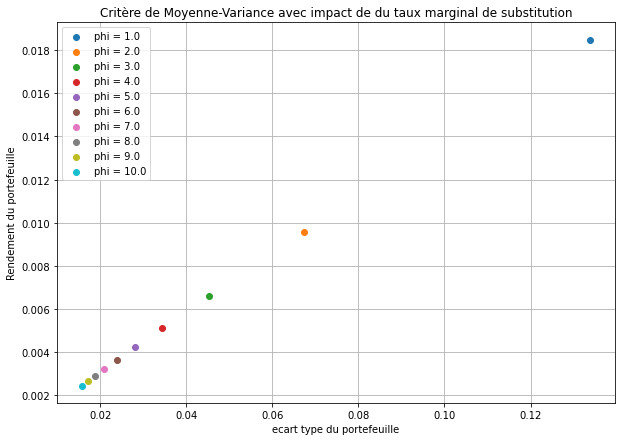

In [27]:
# -------------------- Param√®tres --------------------
number_of_simulations = 5000
nb_of_assets = len(returns.columns)
# -------------------- Trac√©s Fronti√®res Efficientes --------------------
plt.figure(figsize=(10, 7))
for phi in np.linspace(1, 10, 10):
    
    portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations = critere_moyenne_variance_pb1(returns, var_returns, phi, nb_of_assets, number_of_simulations)
    plt.scatter(portfolio_optimized_stds, portfolio_optimized_returns, label= f"phi = {phi}")
plt.title("Crit√®re de Moyenne-Variance avec impact de du taux marginal de substitution")
plt.xlabel("ecart type du portefeuille")
plt.ylabel("Rendement du portefeuille")
plt.grid()
plt.legend()
plt.show()

#### Crit√®re Moyenne Variance Sous contrainte de budget et d'esp√©rence de rendement

In [28]:
def critere_moyenne_variance_pb2(returns, var_returns, phi, nb_of_assets, number_of_simulations):
    portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations = [], [], []
    for _ in range(number_of_simulations):
        returns_m = np.asmatrix(returns.mean())
        vars_m = np.asmatrix(var_returns)

        # Rendements des portefeuilles
        w = np.asmatrix(weights_list(nb_of_assets))
        portfolio_return = w * returns_m.T
        portfolio_std = np.sqrt(w * vars_m * w.T)
        
        #Optimisation
        inv_vars_m = np.linalg.inv(vars_m)
        e = np.asmatrix(np.ones(nb_of_assets))
        A = e * inv_vars_m * returns_m.T
        B = returns_m * inv_vars_m * returns_m.T
        C = e * inv_vars_m * e.T
        D = returns_m * inv_vars_m * e.T
        
        lambd = ((phi-A)/C) - (A/(B*C-A*D)) * (portfolio_return * phi - ((phi - A)/C) - B)
        gamma = (C/(B*C-A*D)) * (portfolio_return * phi - ((phi - A)/C) - B)
        
        w_optimized = (1/phi) * inv_vars_m * (lambd * e + (1 + gamma) * returns_m).T
        portfolio_optimized_allocations.append(w_optimized)
        
        portfolio_optimized_returns.append(np.array(w_optimized.T * returns_m.T).flatten()[0])
        portfolio_optimized_stds.append(np.array(np.sqrt(w_optimized.T * vars_m * w_optimized)).flatten()[0])
    
    return portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations

res = critere_moyenne_variance_pb2(returns, var_returns, phi, nb_of_assets, number_of_simulations)

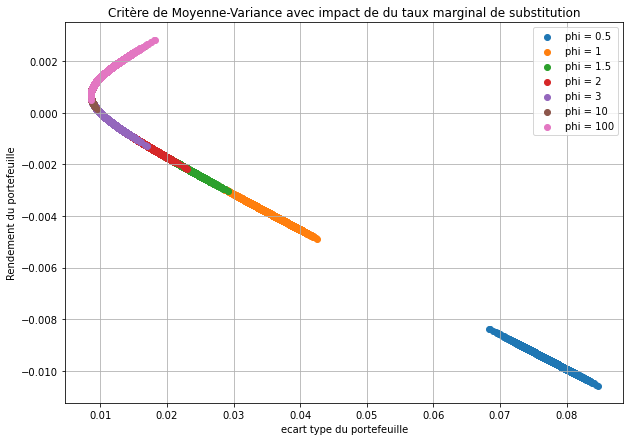

In [29]:
# -------------------- Param√®tres --------------------
number_of_simulations = 5000
nb_of_assets = len(returns.columns)
# -------------------- Trac√©s Fronti√®res Efficientes --------------------
plt.figure(figsize=(10, 7))
for phi in [0.5, 1, 1.5, 2, 3, 10, 100]:
    portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations = critere_moyenne_variance_pb2(returns, var_returns, phi, nb_of_assets, number_of_simulations)
    plt.scatter(portfolio_optimized_stds, portfolio_optimized_returns, label= f"phi = {phi}")
plt.title("Crit√®re de Moyenne-Variance avec impact de du taux marginal de substitution")
plt.xlabel("ecart type du portefeuille")
plt.ylabel("Rendement du portefeuille")
plt.grid()
plt.legend()
plt.show()

### Crit√®re de Protection de rendement

Ces crit√®res permettent de choisir les portefeuilles qui limitent d'avoir un rendement faible. 
Les gestionnaires de fonds garantie ou encore les structureurs utilisent ces crit√®res de selection pour se pr√©munir contre l'incapacit√© de pouvoir r√©pondre √† leurs obligations de paiements minimales.

Nous allons ici en introduire les crit√®res de :

- Roy (1952)


- Tesler (1956)


- Kataoka (1963)

#### Crit√®re de Roy

Soit $R_p$ le rendement du portefeuille et $R_min$ le rendement minimum attendu par le gestionnaire.

Le crit√®re de Roy consistera √† minimiser la probabilit√© que $R_p < R_{min}$:

$$
Min(P(R_p < R_{min})
$$

Pour illustrer ce crit√®re de mani√®re simple nous allons poser quelques hypoth√©ses simplificatrices:

- Le vecteur des rendements des actifs suivent une loi normale multivari√©e (ou loi normale multidimensionnelle) (1)

- Mod√®le d'un march√© sans actif sans risque (2)

- Pas de rebalancement dynamique (3)

Ainsi, de l'hypoth√®se (1) on en d√©duit que :

$$
R_p \sim N(\bar{R_p}, \sigma_p) \Leftrightarrow \frac{R_p - \bar{R_p}}{\sigma_p} \sim N(0, 1)
$$

Le crit√®re de Roy devient:

$$
Min(P(\frac{R_p - \bar{R_p}}{\sigma_p} < \frac{R_{min} - \bar{R_p}}{\sigma_p}))
$$

Ainsi, le probl√®me d'optimisation qui en d√©coule doit maximiser le quotient:

$$
Max(\frac{\bar{R_p} - R_{min}}{\sigma_p})
$$

Analytiquement, on comprend que ce probl√®me d'optimisation, revient √† maximiser la pente "a" de la fonction lin√©aire dans le plan esp√©rance ecart-type:

$$\bar{R_p} = a \cdot \sigma_p + R_{min} $$

Cette droite part du point d'interception $R_{min}$ et on verra ci-dessous que le portefeuille qui maximise cette pente est le portefeuille tangent.

/Users/ayoub/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


----------ACAD----------
Statistics=0.873, p=0.000
ACAD distribution does not look Gaussian (reject H0)
----------ATVI----------
Statistics=0.746, p=0.000
ATVI distribution does not look Gaussian (reject H0)
----------BABA----------
Statistics=0.951, p=0.000
BABA distribution does not look Gaussian (reject H0)
----------LLY----------
Statistics=0.970, p=0.000
LLY distribution does not look Gaussian (reject H0)
----------MO----------
Statistics=0.966, p=0.000
MO distribution does not look Gaussian (reject H0)
----------T----------
Statistics=0.882, p=0.000
T distribution does not look Gaussian (reject H0)


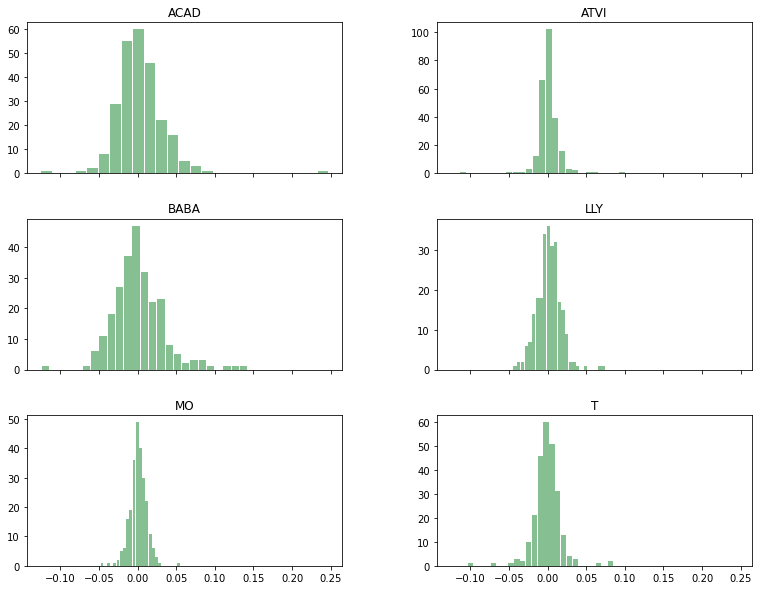

In [30]:
# Verification de l'hypoth√®se de loi multivari√©e
#For Chapter 4.1
from scipy.stats import shapiro

# Histogram distribution for each stock
ax = returns.hist(bins=25, grid=False, figsize=(13,10), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

# Shapiro-Wilk Test
alpha = 0.01
for stock in returns.columns:
    stat, p = shapiro(returns[stock])
    print("-"*10 + stock + "-"*10)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print(f'{stock} distribution looks Gaussian (fail to reject H0)')
    else:
        print(f'{stock} distribution does not look Gaussian (reject H0)')

--- MVP --- 
MVP Return:  0.000678975816211362
MVP Std:  0.008532503771354007
MVP Allocation:  [[ 1.46338864 23.55122789  1.8555359  19.75573036 41.49555755 11.87855968]]
Rmin = 0.0001538185471079423


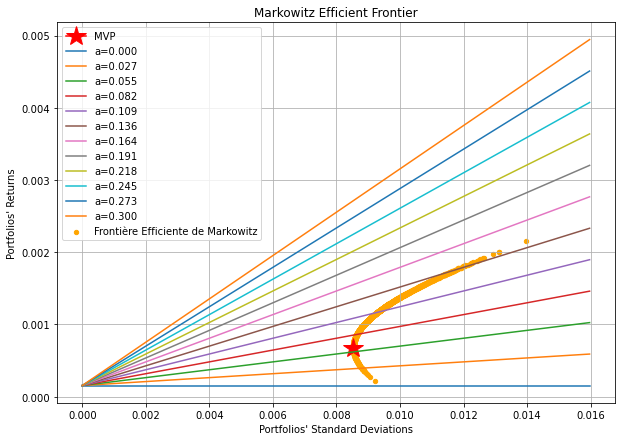

In [31]:
# ------------------ Portefeuille de variance minimale ------------------
nb_of_assets = len(returns.columns)
number_of_simulations = 2000
portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations = analyse_moyenne_variance_risked_pf(returns, var_returns, nb_of_assets, number_of_simulations)
mvp_std = np.min(portfolio_optimized_stds)
index_mvp_std = portfolio_optimized_stds.index(mvp_std)
mvp_return =  portfolio_optimized_returns[index_mvp_std]
mvp_allocation = portfolio_optimized_allocations[index_mvp_std]

print("--- MVP --- ")
print("MVP Return: ", mvp_return)
print("MVP Std: ", mvp_std)
print("MVP Allocation: ", 100*mvp_allocation)


plt.figure(figsize=(10, 7))
# ------------------ Fonti√®re efficiente ------------------
plt.scatter(portfolio_optimized_stds, portfolio_optimized_returns, color="orange", marker="o", s=19, label="Fronti√®re Efficiente de Markowitz")
# ------------------ Fonti√®re efficiente ------------------
plt.plot(mvp_std, mvp_return, label = "MVP", marker="*", color="red", markersize=20)
# ------------------ Crit√®re de Roy ------------------
Rmin = (1 + 0.04)**(1/255) - 1
print("Rmin =", Rmin)
sigmas = np.array([0, max(portfolio_optimized_stds) + 0.002])
for a in np.linspace(0, 0.30, 12):
    Rp = a * sigmas + Rmin
    plt.plot(sigmas, Rp, label="a=%.3f" % a)

plt.title("Markowitz Efficient Frontier")
plt.xlabel("Portfolios' Standard Deviations")
plt.ylabel("Portfolios' Returns")
plt.grid()
plt.legend()
plt.show()

Par notre simulation num√©rique on supposerait que la pente a serait autour de 0.245

Essayons de le d√©montrer rigoursement en r√©solvant l'√©quation caract√©ristque de l'hyperbole :

$$ 
\frac{\sigma_p^2(R_p)}{\frac{1}{C}} - \frac{(E(R_p)-\frac{A}{C})^2}{\frac{d}{C^2}} = 1
$$

En substituant $E(R_p)$ par $ a \cdot \sigma_p(R_p) + R_{min} $, nous avons une equation du second degr√© sur $\sigma_p$. La pente sera la solution positive de l'√©quation associ√©e √† son discrimant nul:

$$\Delta = 0$$

En r√©solvant, nous obtenons la solution:

$$
a = \sqrt{\frac{d + A^2 + R_{min}^2 \cdot C^2 - 2 \cdot A \cdot R_{min} \cdot C}{C}}
$$

In [32]:
def analyse_moyenne_variance_risked_with_Roy_criteria(returns, var_returns, nb_of_assets, number_of_simulations, Rmin):
    portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations = [], [], []
    for _ in range(number_of_simulations):
        returns_m = np.asmatrix(returns.mean())
        vars_m = np.asmatrix(var_returns)

        # Random portfolios
        w = np.asmatrix(weights_list(nb_of_assets))
        portfolio_return = w * returns_m.T

        #Optimisation
        e = np.asmatrix(np.ones(nb_of_assets))
        inv_vars_m = np.linalg.inv(vars_m)
        A = e * inv_vars_m * returns_m.T
        B = returns_m * inv_vars_m * returns_m.T
        C = e * inv_vars_m * e.T
        d = B*C - np.power(A, 2)
        f1 = inv_vars_m * returns_m.T
        f2 = inv_vars_m * e.T

        w_optimized = (1/d) * ((C * portfolio_return - A) * f1.T + (B - A * portfolio_return) * f2.T)
        portfolio_optimized_allocations.append(w_optimized)
        portfolio_optimized_returns.append(np.array(w_optimized * returns_m.T).flatten()[0])
        portfolio_optimized_stds.append(np.array(np.sqrt(w_optimized * vars_m * w_optimized.T)).flatten()[0])
        
    #Tangente
    pente = np.array(np.sqrt((d+(A**2)+(Rmin**2)*(C**2)-(2*A*Rmin*C))/C)).flatten()[0]
    sigma_inter = np.array((Rmin - (A/C))/(np.sqrt(d/C) - pente)).flatten()[0]
    return_inter = np.array(np.sqrt(d/C) * sigma_inter + (A/C)).flatten()[0]
        
    return portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations, (pente, sigma_inter, return_inter)

 --- MVP --- 
MVP Return:  0.0006769950988250454
MVP Std:  0.008532510859877213
MVP Allocation:  [[ 1.43207585 23.55047059  1.84996565 19.71472838 41.51738109 11.93537844]]

 --- Crit√®re de Roy --- 
Rentabilit√© minimale: 0.0001538185471079423
Pente: 0.14694042014420106
Rendement: 0.005870480830510482
Volatilti√©: 0.03890462731624458


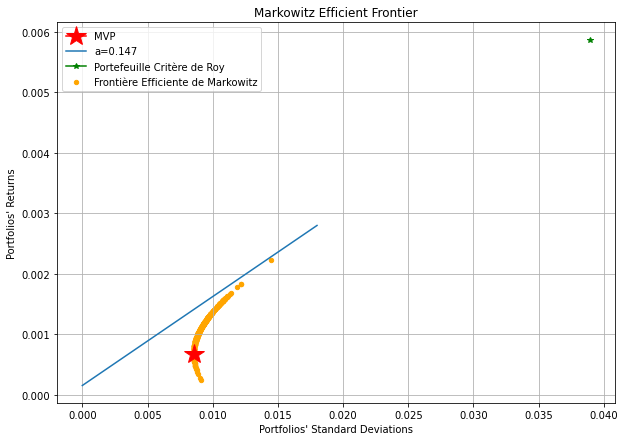

In [33]:
# ------------------ Parameters ------------------ 
nb_of_assets = len(tickers)
number_of_simulations = 500
Rmin = (1 + 0.04)**(1/255) - 1

# ------------------ Portefeuille de variance minimale ------------------
portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations, tangente = analyse_moyenne_variance_risked_with_Roy_criteria(returns, var_returns, nb_of_assets, number_of_simulations, Rmin)
mvp_std = np.min(portfolio_optimized_stds)
index_mvp_std = portfolio_optimized_stds.index(mvp_std)
mvp_return =  portfolio_optimized_returns[index_mvp_std]
mvp_allocation = portfolio_optimized_allocations[index_mvp_std]

print(" --- MVP --- ")
print("MVP Return: ", mvp_return)
print("MVP Std: ", mvp_std)
print("MVP Allocation: ", 100*mvp_allocation)


# ------------------// Graphes //------------------
plt.figure(figsize=(10, 7))

# ------------------ Fronti√®re efficiente ------------------
plt.scatter(portfolio_optimized_stds, portfolio_optimized_returns, color="orange", marker="o", s=19, label="Fronti√®re Efficiente de Markowitz")

# ------------------ MVP ------------------
plt.plot(mvp_std, mvp_return, label = "MVP", marker="*", color="red", markersize=20)

# ------------------ Portefeuille Crit√®re de Roy ------------------
sigmas, Rp = [0, 0.018], []
print("\n --- Crit√®re de Roy --- ")
print("Rentabilit√© minimale:", Rmin)
print("Pente:", tangente[0])
print("Rendement:", tangente[2])
print("Volatilti√©:", tangente[1])
for sigma in sigmas:
    Rp.append(tangente[0] * sigma + Rmin)
plt.plot(sigmas, Rp, label="a=%.3f" % tangente[0])
plt.plot(tangente[1], tangente[2], label="Portefeuille Crit√®re de Roy", marker = "*", color="green")

# ------------------ Config ------------------
plt.title("Markowitz Efficient Frontier")
plt.xlabel("Portfolios' Standard Deviations")
plt.ylabel("Portfolios' Returns")
plt.grid()
plt.legend()